## Test infer

In [1]:
(require '[whittemore.core
           :refer [define model q data identify all-vals
                   estimate categorical infer measure]]
         '[clojure.pprint :refer [pprint]]
         '[whittemore.io :refer [read-csv head tail]]
         '[whittemore.plot :refer [plot-univariate plot-p-map]]
         '[whittemore.util :refer [map-vals]]
         '[clojure.repl :refer [doc]]
         :reload)

In [2]:
(define awesome
  "An awesome model"
  (model
    {:z [:x]
     :x []
     :y [:z]}
    #{:x :y}))

In [3]:
(def kidney-dataset (read-csv "data/renal-calculi.csv"))

(count kidney-dataset)

700

In [4]:
(head kidney-dataset)

:size,:success,:treatment
"""small""","""yes""","""surgery"""
"""large""","""yes""","""nephrolithotomy"""
"""small""","""yes""","""surgery"""
"""small""","""yes""","""surgery"""
"""large""","""yes""","""nephrolithotomy"""
"""large""","""yes""","""surgery"""
"""small""","""yes""","""nephrolithotomy"""
"""small""","""yes""","""surgery"""
"""large""","""no""","""nephrolithotomy"""
"""large""","""yes""","""nephrolithotomy"""


In [5]:
(def kidney-distribution
  (categorical kidney-dataset))

(:support kidney-distribution)

{:size #{"small" "large"}, :success #{"yes" "no"}, :treatment #{"surgery" "nephrolithotomy"}}

In [6]:
(define kidney-pmf
  (estimate kidney-distribution
    (q [:success :treatment :size])))

#whittemore.core.Categorical{:pmf {{:size "small", :success "yes", :treatment "surgery"} 0.11571428571428571, {:size "small", :success "yes", :treatment "nephrolithotomy"} 0.3342857142857143, {:size "small", :success "no", :treatment "surgery"} 0.008571428571428572, {:size "small", :success "no", :treatment "nephrolithotomy"} 0.05142857142857143, {:size "large", :success "yes", :treatment "surgery"} 0.2742857142857143, {:size "large", :success "yes", :treatment "nephrolithotomy"} 0.07857142857142857, {:size "large", :success "no", :treatment "surgery"} 0.10142857142857142, {:size "large", :success "no", :treatment "nephrolithotomy"} 0.03571428571428571}}

In [7]:
(-> kidney-pmf :pmf keys all-vals)

{:size #{"small" "large"}, :success #{"yes" "no"}, :treatment #{"surgery" "nephrolithotomy"}}

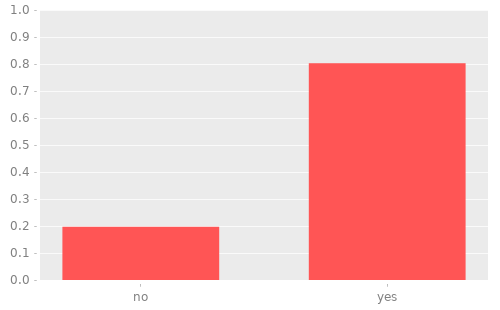

In [8]:
(plot-univariate kidney-pmf :success)

### Simpson's paradox

In [9]:
(let [a (estimate kidney-distribution
          (q {:success "yes"} :given {:treatment "surgery"}))
      b (estimate kidney-distribution
          (q {:success "yes"} :given {:treatment "nephrolithotomy"}))]
  (println a "<" b "=>" (< a b)))

0.78 < 0.8257142857142857 => true


In [10]:
(let [a (estimate kidney-distribution
          (q {:success "yes"} :given {:treatment "surgery"
                                      :size "small"}))
      b (estimate kidney-distribution
          (q {:success "yes"} :given {:treatment "nephrolithotomy"
                                      :size "small"}))]
  (println a "<" b "=>" (< a b)))

0.9310344827586207 < 0.8666666666666667 => false


In [11]:
(let [a (estimate kidney-distribution
          (q {:success "yes"} :given {:treatment "surgery"
                                      :size "large"}))
      b (estimate kidney-distribution
          (q {:success "yes"} :given {:treatment "nephrolithotomy"
                                      :size "large"}))]
  (println a "<" b "=>" (< a b)))

0.7300380228136882 < 0.6875 => false


In [12]:
(define charig1986
  (model
    {:size []
     :treatment [:size]
     :success [:treatment :size]}))

In [13]:
(define f
  (identify
    charig1986
    (q {:success "yes"} :do {:treatment "surgery"})))

In [14]:
(estimate kidney-distribution f)

0.8325462173856037

In [15]:
(define g
  (identify
    charig1986
    (q [:success] :do {:treatment "surgery"})))

In [16]:
(measure
  (estimate kidney-distribution g)
  {:success "no"})

0.16745378261439622

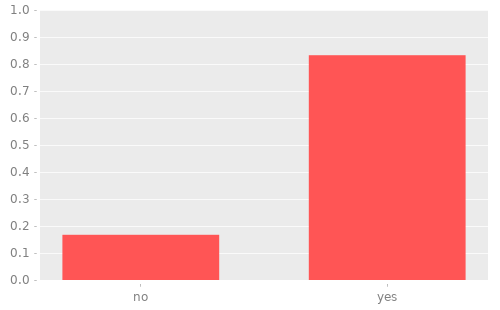

In [17]:
(plot-univariate (estimate kidney-distribution g))

In [18]:
(infer
  charig1986
  kidney-distribution
  (q [:success] :do {:treatment "surgery"}))

#whittemore.core.Categorical{:pmf {{:success "yes"} 0.8325462173856037, {:success "no"} 0.16745378261439622}}